In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Load the datasets in dF
cst = pd.read_csv('olist_customers_dataset.csv')
loc = pd.read_csv('olist_geolocation_dataset.csv')
itm = pd.read_csv('olist_order_items_dataset.csv')
pay = pd.read_csv('olist_order_payments_dataset.csv')
rev = pd.read_csv('olist_order_reviews_dataset.csv')
prd = pd.read_csv('olist_products_dataset.csv')
ordr = pd.read_csv('olist_orders_dataset.csv')
sel = pd.read_csv('olist_sellers_dataset.csv')
tsl = pd.read_csv('product_category_name_translation.csv')

### I. Counting principal dF loaded

**I.1 Customer dF**

In [ ]:
cst['customer_unique_id'].describe()

**I.2 Product dF**

In [ ]:
itm['product_id'].describe()

**I.3 Seller dF**

In [ ]:
sel['seller_id'].describe()

### II. Harmonized dF with merge operations

In [2]:
# List of all dF
a = [cst, loc, itm, pay, rev, prd, ordr, sel]

In [2]:
# Check unique value and shape of both dF to...
print('REVIEW dF | Key unique value:', len(rev['order_id'].unique()),
      '| Shape:', rev.shape)
print('ORDER  dF | Key unique value:', len(ordr['order_id'].unique()),
      '| Shape:', ordr.shape)

# Merge
b = rev.merge(ordr, on='order_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF | Key unique value:', len(b['order_id'].unique()),
      '| Shape:', b.shape)

print('\n', b['_merge'].value_counts())
b.drop(columns='_merge', inplace=True)

REVIEW dF | Key unique value: 99441 | Shape: (100000, 7)
ORDER  dF | Key unique value: 99441 | Shape: (99441, 8)

MERGED dF | Key unique value: 99441 | Shape: (100000, 15)

 both          100000
right_only         0
left_only          0
Name: _merge, dtype: int64


In [3]:
# Check unique value and shape of both dF to...
print('ITEM dF   | Key unique value:', len(itm['order_id'].unique()),
      '| Shape:', itm.shape)
print('PAY  dF   | Key unique value:', len(pay['order_id'].unique()),
      '| Shape:', pay.shape)

# Merge
c = itm.merge(pay, on='order_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF | Key unique value:', len(c['order_id'].unique()),
      '| Shape:', c.shape)

print('\n', c['_merge'].value_counts())
c.drop(columns='_merge', inplace=True)

ITEM dF   | Key unique value: 98666 | Shape: (112650, 7)
PAY  dF   | Key unique value: 99440 | Shape: (103886, 5)

MERGED dF | Key unique value: 98665 | Shape: (117601, 12)

 both          117601
right_only         0
left_only          0
Name: _merge, dtype: int64


In [4]:
# Check unique value and shape of both dF to...
print('c dF      | Key unique value:', len(c['order_id'].unique()), '| Shape:',
      c.shape)
print('b dF      | Key unique value:', len(b['order_id'].unique()), '| Shape:',
      b.shape)

# Merge
d = c.merge(b, on='order_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF | Key unique value:', len(d['order_id'].unique()),
      '| Shape:', d.shape)

print('\n', d['_merge'].value_counts())
d.drop(columns='_merge', inplace=True)

c dF      | Key unique value: 98665 | Shape: (117601, 11)
b dF      | Key unique value: 99441 | Shape: (100000, 14)

MERGED dF | Key unique value: 98665 | Shape: (118315, 25)

 both          118315
right_only         0
left_only          0
Name: _merge, dtype: int64


In [5]:
# Check unique value and shape of both dF to...
print('d dF       | Key unique value:', len(d['product_id'].unique()),
      '| Shape:', d.shape)
print('PRODUCT dF | Key unique value:', len(prd['product_id'].unique()),
      '| Shape:', prd.shape)

# Merge
e = d.merge(prd, on='product_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF  | Key unique value:', len(e['order_id'].unique()),
      '| Shape:', e.shape)

print('\n', e['_merge'].value_counts())
e.drop(columns='_merge', inplace=True)

d dF       | Key unique value: 32951 | Shape: (118315, 24)
PRODUCT dF | Key unique value: 32951 | Shape: (32951, 9)

MERGED dF  | Key unique value: 98665 | Shape: (118315, 33)

 both          118315
right_only         0
left_only          0
Name: _merge, dtype: int64


In [6]:
# Check unique value and shape of both dF to...
print('e dF        | Key unique value:', len(e['customer_id'].unique()),
      '| Shape:', e.shape)
print('CUSTOMER dF | Key unique value:', len(cst['customer_id'].unique()),
      '| Shape:', cst.shape)

# Merge
f = e.merge(cst, on='customer_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF   | Key unique value:', len(f['customer_id'].unique()),
      '| Shape:', f.shape)

print('\n', f['_merge'].value_counts())
f.drop(columns='_merge', inplace=True)

e dF        | Key unique value: 98665 | Shape: (118315, 32)
CUSTOMER dF | Key unique value: 99441 | Shape: (99441, 5)

MERGED dF   | Key unique value: 98665 | Shape: (118315, 37)

 both          118315
right_only         0
left_only          0
Name: _merge, dtype: int64


In [7]:
# Check unique value and shape of both dF to...
print('f dF      | Key unique value:', len(f['seller_id'].unique()),
      '| Shape:', f.shape)
print('SELLER dF | Key unique value:', len(sel['seller_id'].unique()),
      '| Shape:', sel.shape)

# Merge
df_original = f.merge(sel, on='seller_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF | Key unique value:', len(df_original['order_id'].unique()),
      '| Shape:', df_original.shape)

print('\n', df_original['_merge'].value_counts())
df_original.drop(columns='_merge', inplace=True)

f dF      | Key unique value: 3095 | Shape: (118315, 36)
SELLER dF | Key unique value: 3095 | Shape: (3095, 4)

MERGED dF | Key unique value: 98665 | Shape: (118315, 40)

 both          118315
right_only         0
left_only          0
Name: _merge, dtype: int64


### III. Cleaning

**III.1 Ordering dF by columns type**

In [8]:
# List of features organized by continue / discrete types
date_list = [
    'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp',
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

adress = ['customer_zip_code_prefix', 'seller_zip_code_prefix']

cat_to_dis = [
    'customer_city', 'customer_state', 'seller_city', 'seller_state',
    'payment_type', 'order_status', 'product_category_name'
]

id_list = [
    'order_id', 'product_id', 'seller_id', 'review_id', 'customer_id',
    'customer_unique_id', 'order_item_id'
]

In [9]:
# Concatenation to ordering dF
df = pd.concat(
    [
        df_original.loc[:, date_list],  # Date
        df_original.loc[:, adress],  # Adress
        df_original.loc[:, cat_to_dis],  # Categorical -> Discretize
        df_original.loc[:, id_list]  # Id
    ],
    axis=1)

df = pd.concat([df, df_original.drop(columns=df.columns)], axis=1)
df.drop(columns=['review_comment_title', 'review_comment_message'],
        inplace=True)

In [10]:
# Clean datas
df = df.dropna()
df

,shipping_limit_date,review_creation_date,review_answer_timestamp,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,seller_zip_code_prefix,customer_city,customer_state,seller_city,seller_state,payment_type,order_status,product_category_name,order_id,product_id,seller_id,review_id,customer_id,customer_unique_id,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,2017-09-19 09:45:35,2017-09-21 00:00:00,2017-09-22 10:57:03,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,28013,27277,campos dos goytacazes,RJ,volta redonda,SP,credit_card,delivered,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,97ca439bc427b48bc1cd7177abe71365,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,1,58.9,13.29,1,2,72.19,5,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,2017-07-05 02:44:11,2017-07-14 00:00:00,2017-07-17 12:50:07,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,75800,27277,jatai,GO,volta redonda,SP,boleto,delivered,cool_stuff,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,b11cba360bbe71410c291b764753d37f,e6eecc5a77de221464d1c4eaff0a9b64,0fb8e3eab2d3e79d92bb3fffbb97f188,1,55.9,17.96,1,1,73.86,5,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,2018-05-23 10:56:25,2018-06-05 00:00:00,2018-06-06 21:41:12,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,30720,27277,belo horizonte,MG,volta redonda,SP,credit_card,delivered,cool_stuff,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,af01c4017c5ab46df6cc810e069e654a,4ef55bf80f711b372afebcb7c715344a,3419052c8c6b45daf79c1e426f9e9bcb,1,64.9,18.33,1,2,83.23,4,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,2017-08-07 18:55:08,2017-08-10 00:00:00,2017-08-13 03:35:17,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,83070,27277,sao jose dos pinhais,PR,volta redonda,SP,credit_card,delivered,cool_stuff,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8304ff37d8b16b57086fa283fe0c44f8,30407a72ad8b3f4df4d15369126b20c9,e7c828d22c0682c1565252deefbe334d,1,58.9,16.17,1,3,75.07,5,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,2017-08-16 22:05:11,2017-08-25 00:00:00,2017-08-28 00:51:18,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,36400,27277,conselheiro lafaiete,MG,volta redonda,SP,credit_card,delivered,cool_stuff,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,426f43a82185969503fb3c86241a9535,91a792fef70ecd8cc69d3c7feb3d12da,0bb98ba72dcc08e95f9d8cc434e9a2cc,1,58.9,13.29,1,4,72.19,5,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,2017-04-27 05:10:28,2017-05-25 00:00:00,2017-05-26 11:42:36,2017-04-19 10:20:51,2017-04-21 05:10:28,2017-05-04 15:06:24,2017-05-24 10:52:43,2017-05-22 00:00:00,22793,80220,rio de janeiro,RJ,curitiba,PR,boleto,delivered,moveis_decoracao,fdaf98feac227eb978d8f33f36e0231d,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,fd48db39884359395ff6f18c8822aa7b,81ae83ce1a10af9f93fa3512bd9713b1,3d50a44231c2a153219cef76ee3e445d,1,119.9,16.14,1,1,136.04,4,44.0,533.0,2.0,1000.0,69.0,11.0,11.0
118311,2017-08-17 02:55:27,2017-08-18 00:00:00,2017-08-19 13:16:38,2017-08-11 10:15:22,2017-08-12 02:55:27,2017-08-14 22:03:19,2017-08-17 17:47:55,2017-09-04 00:00:00,13485,82620,lim

**III.2 Changing format to date**

In [11]:
# Change dtype to datetime
for i in df.iloc[:, :8]:
    df[i] = pd.to_datetime(df[i])
    df[i] = df[i].dt.date

df.iloc[:, :8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114073 entries, 0 to 118314
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   shipping_limit_date            114073 non-null  object
 1   review_creation_date           114073 non-null  object
 2   review_answer_timestamp        114073 non-null  object
 3   order_purchase_timestamp       114073 non-null  object
 4   order_approved_at              114073 non-null  object
 5   order_delivered_carrier_date   114073 non-null  object
 6   order_delivered_customer_date  114073 non-null  object
 7   order_estimated_delivery_date  114073 non-null  object
dtypes: object(8)
memory usage: 7.8+ MB


**III.3 Changing product category name**

In [12]:
for i, j in zip(tsl['product_category_name'],
                tsl['product_category_name_english']):
    df['product_category_name'].replace({i: j}, inplace=True)

# Category in english

### IV. Exploration

See Exploration in A_Exploration_RFM notebook

### V. Feature engineering 

**V.1 Create Recency, Frequency, Amount Features**

In [13]:
# Transform categorical datas with one hot encoder
one_hot = pd.get_dummies(df['payment_type'])
df.drop(columns='payment_type', inplace=True)
df = pd.concat([df, one_hot], axis=1)

In [14]:
# Feature extracting the first command by customers
R_table = df[['customer_unique_id',
              'order_approved_at']].sort_values(by='order_approved_at')
R_table.drop_duplicates(subset='customer_unique_id', keep='last', inplace=True)

In [15]:
# Feature extracting the number of command by customers
F_table = df[['customer_unique_id',
              'order_approved_at']].sort_values(by='order_approved_at')

F_table = F_table.groupby(['customer_unique_id']).count()

In [16]:
import numpy as np

# Feature extracting payment type, number of loan and total amount spent on the website
df['price'] = df['price'] + df['freight_value']

M_table = pd.pivot_table(df,
                         values=['price'],
                         index=['customer_unique_id'],
                         aggfunc=np.sum)

In [17]:
# Concatenate F & M table
FM_table = pd.concat([F_table, M_table], axis=1)
FM_table['n_command'] = FM_table['order_approved_at']
FM_table.drop(columns='order_approved_at', inplace=True)

In [18]:
# Merge R & FM table
RFM_table = R_table.merge(FM_table, on='customer_unique_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF | Key unique value:',
      len(RFM_table['customer_unique_id'].unique()), '| Shape:',
      RFM_table.shape)

print('\n', RFM_table['_merge'].value_counts())
RFM_table.drop(columns='_merge', inplace=True)
RFM_table.drop(columns='customer_unique_id', inplace=True)


MERGED dF | Key unique value: 92081 | Shape: (92081, 5)

 both          92081
right_only        0
left_only         0
Name: _merge, dtype: int64


In [19]:
RFM_table.head()

,order_approved_at,price,n_command
0,2016-10-04,92.27,1
1,2016-10-04,319.00,1
2,2016-10-04,18.62,1
3,2016-10-04,35.61,1
4,2016-10-04,101.44,2


**V.2 Ordering customer recency**

In [20]:
from datetime import timedelta

month = timedelta(days=30)
trim = timedelta(days=90)
half = timedelta(days=182)
year = timedelta(days=365)

new = np.where(
    R_table['order_approved_at'] > R_table['order_approved_at'].max() - month)

very_recent = np.where(
    R_table['order_approved_at'] > R_table['order_approved_at'].max() - trim)

recent = np.where(
    R_table['order_approved_at'] > R_table['order_approved_at'].max() - half)

old = np.where(
    R_table['order_approved_at'] > R_table['order_approved_at'].max() - year)

R_table['order_approved_at'] = 1

R_table['order_approved_at'].iloc[old] = 2

R_table['order_approved_at'].iloc[recent] = 3

R_table['order_approved_at'].iloc[very_recent] = 4

R_table['order_approved_at'].iloc[new] = 5

C:\Users\DrDjekyl\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**V.3 Other features**

In [21]:
encoded_features = pd.pivot_table(df,
                                  values=df.iloc[:, 36:],
                                  index=['customer_unique_id'],
                                  aggfunc=np.sum)

In [22]:
df.iloc[:, 36:]

,boleto,credit_card,debit_card,voucher
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
118310,1,0,0,0
118311,1,0,0,0
118312,1,0,0,0
118313,0,1,0,0


In [23]:
est_del = df['order_estimated_delivery_date']
real_del = df['order_delivered_customer_date']
app_del = df['order_approved_at']

# Feature to express time span between order and delivery
df['delivery_hours'] = (real_del - app_del).astype('timedelta64[h]')

df['delivery_hours']

0         168.0
1         336.0
2         408.0
3         192.0
4         336.0
          ...  
118310    792.0
118311    120.0
118312    456.0
118313    192.0
118314    192.0
Name: delivery_hours, Length: 114073, dtype: float64

In [24]:
from sklearn import preprocessing

# Feature to express delay in oder delivery
df['delay'] = est_del[est_del < real_del].isna()
df['delay'].replace(np.nan, 1, inplace=True)

# Label False to 0
le = preprocessing.LabelEncoder()
le.fit(df['delay'])
df['delay'] = le.transform(df['delay'])

# Invert 0 to 1 and 1 to 0
df['delay'].replace(1, 'a', inplace=True)
df['delay'].replace(0, 1, inplace=True)
df['delay'].replace('a', 0, inplace=True)

# 0 = No delay, 1 = Delay
df['delay'].head(6)

0    0
1    0
2    0
3    0
4    0
5    1
Name: delay, dtype: int64

In [25]:
delivery = pd.pivot_table(df,
                          values=['delivery_hours'],
                          index=['customer_unique_id'],
                          aggfunc=np.mean)

In [26]:
delay = pd.pivot_table(df,
                       values=['delay'],
                       index=['customer_unique_id'],
                       aggfunc=np.sum)

In [27]:
review = pd.pivot_table(df,
                        values=['review_score'],
                        index=['customer_unique_id'],
                        aggfunc=np.median)

In [28]:
payment = pd.pivot_table(df,
                         values=['payment_sequential', 'payment_installments'],
                         index=['customer_unique_id'],
                         aggfunc=np.mean)

In [29]:
items = pd.pivot_table(df,
                       values=['order_item_id'],
                       index=['customer_unique_id'],
                       aggfunc=np.median)

In [30]:
df_final = pd.concat(
    [FM_table, review, delivery, delay, encoded_features, payment, items],
    axis=1).merge(R_table, on='customer_unique_id', indicator=True)

# Then check the dF merged
print('\nMERGED dF | Key unique value:',
      len(df_final['customer_unique_id'].unique()), '| Shape:', df_final.shape)

print('\n', df_final['_merge'].value_counts())
df_final.drop(columns='_merge', inplace=True)
df_final.drop(columns='customer_unique_id', inplace=True)


MERGED dF | Key unique value: 92081 | Shape: (92081, 15)

 both          92081
right_only        0
left_only         0
Name: _merge, dtype: int64


In [31]:
df_final

,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,order_approved_at
0,141.90,1,5.0,144.0,0,0,1,0,0,8.0,1.0,1.0,3
1,27.19,1,4.0,72.0,0,0,1,0,0,1.0,1.0,1.0,3
2,86.22,1,3.0,624.0,0,0,1,0,0,8.0,1.0,1.0,1
3,43.62,1,4.0,480.0,0,0,1,0,0,4.0,1.0,1.0,2
4,196.89,1,5.0,312.0,0,0,1,0,0,6.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92076,2067.42,2,5.0,672.0,0,0,2,0,0,10.0,1.0,1.5,1
92077,84.58,1,4.0,720.0,0,0,1,0,0,1.0,1.0,1.0,2
92078,112.46,1,5.0,360.0,0,0,1,0,0,1.0,1.0,1.0,1
92079,133.69,1,5.0,288.0,0,0,1,0,0,5.0,1.0,1.0,3


**V.4 Log, Scaling, Sampling**

In [32]:
df_final[['price', 'delivery_hours']] = df_final[['price', 'delivery_hours'
                                                  ]].add(1).apply(np.log)
df_final = df_final.round(2)

df_final.head()

,price,n_command,review_score,delivery_hours,delay,boleto,credit_card,debit_card,voucher,payment_installments,payment_sequential,order_item_id,order_approved_at
0,4.96,1,5.0,4.98,0,0,1,0,0,8.0,1.0,1.0,3
1,3.34,1,4.0,4.29,0,0,1,0,0,1.0,1.0,1.0,3
2,4.47,1,3.0,6.44,0,0,1,0,0,8.0,1.0,1.0,1
3,3.80,1,4.0,6.18,0,0,1,0,0,4.0,1.0,1.0,2
4,5.29,1,5.0,5.75,0,0,1,0,0,6.0,1.0,1.0,2


In [33]:
# Delete infinite values
with pd.option_context('mode.use_inf_as_null', True):
    df_final = df_final.dropna()

In [34]:
from sklearn import preprocessing

# Scaling dF
df_scaled = preprocessing.StandardScaler().fit_transform(df_final)

In [39]:
%run B_Support.ipynb

# Sampling
sample_df = stratified_sample(df_final, ['n_command', 'order_approved_at'],
                              size=5000,
                              keep_index=True)

# Scaling sample
sp_scaled = preprocessing.StandardScaler().fit_transform(sample_df.iloc[:, 1:])

<ipython-input-39-f7f6f9225bc6>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['size'] = 1


In [68]:
%store df_scaled
%store sample_df
%store sp_scaled

Stored 'df_scaled' (ndarray)
Stored 'sample_df' (DataFrame)
Stored 'sp_scaled' (ndarray)


### VI. Principal Component Analysis

In [42]:
from sklearn import decomposition

n_components = 13

pca = decomposition.PCA(n_components=n_components)
reduced = pca.fit_transform(df_scaled)

In [43]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[2.12419065e-01 1.48664238e-01 1.25983417e-01 1.15627914e-01
 8.52921564e-02 7.94728612e-02 7.34100925e-02 5.33943007e-02
 4.32564053e-02 3.64613954e-02 1.36279335e-02 1.23902206e-02
 5.31323420e-32]
1.0


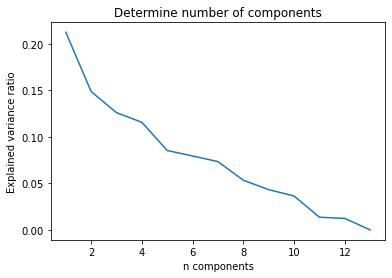

In [44]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, n_components + 1), pca.explained_variance_ratio_)

plt.title('Determine number of components')
plt.xlabel('n components')
plt.ylabel('Explained variance ratio')

plt.show()

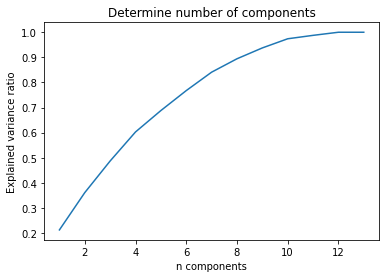

In [45]:
plt.plot(np.arange(1, n_components + 1),
         np.cumsum(pca.explained_variance_ratio_))

plt.title('Determine number of components')
plt.xlabel('n components')
plt.ylabel('Explained variance ratio')

plt.show()

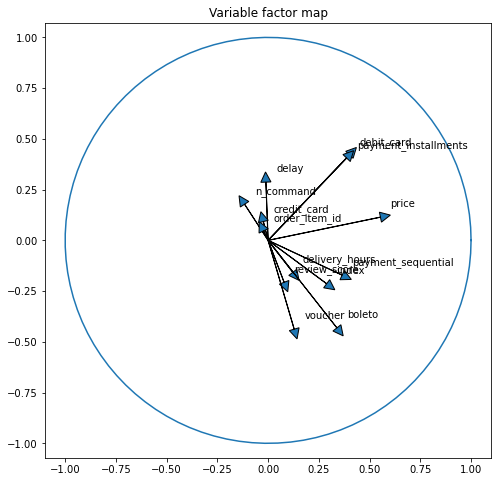

In [46]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))

for i in range(0, pca.components_.shape[1]):
    ax.arrow(
        0,
        0,  # Start the arrow at the origin
        pca.components_[0, i],  # 0 for PC1
        pca.components_[1, i],  # 1 for PC2
        head_width=0.05,
        head_length=0.05)

    plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05,
             sample_df.columns.values[i])

# Add a unit circle for scale
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))

plt.axis('equal')
ax.set_title('Variable factor map')

plt.show()

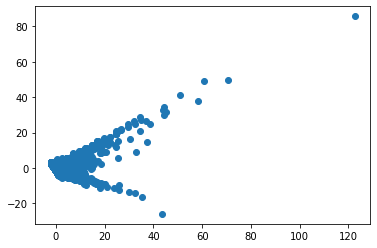

In [70]:
plt.scatter(reduced[:, 0], reduced[:, 1])

In [71]:
%store reduced

Stored 'reduced' (ndarray)


## VII. t-SNE

*************************************************
Perplixity: 10


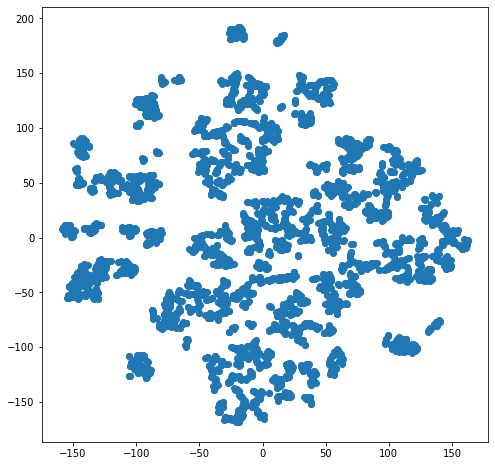

*************************************************
Perplixity: 20


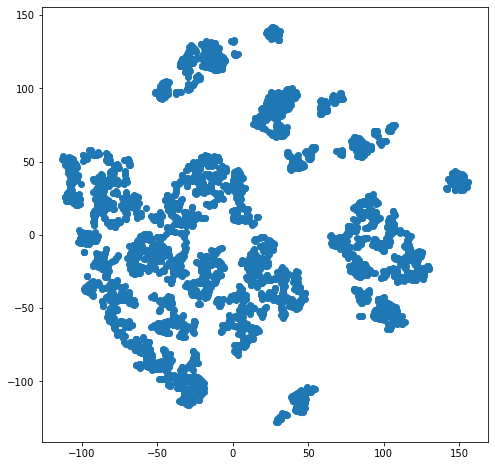

*************************************************
Perplixity: 30


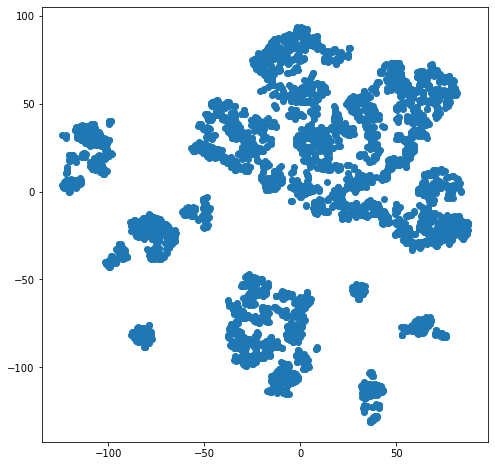

*************************************************
Perplixity: 40


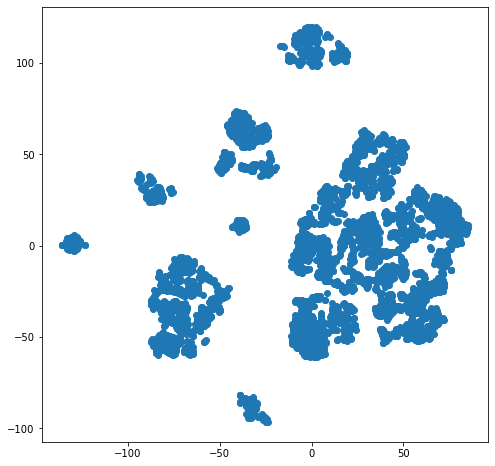

*************************************************
Perplixity: 50


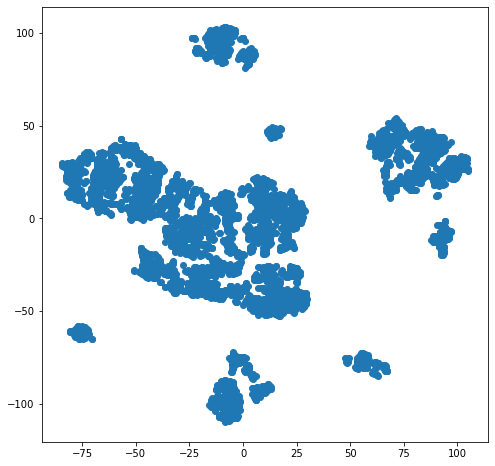

*************************************************
Perplixity: 60


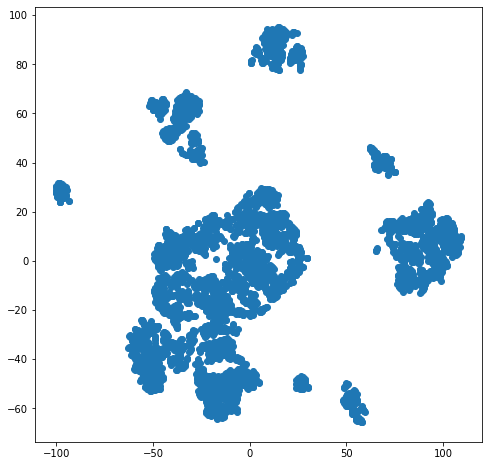

*************************************************
Perplixity: 70


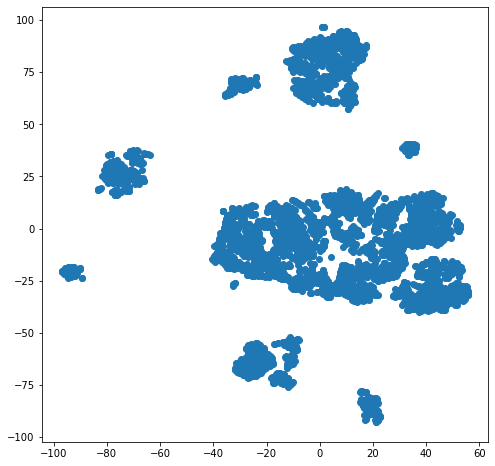

In [60]:
from sklearn.manifold import TSNE

perpl = np.arange(10, 71, 10)

for i in perpl:
    print('*************************************************')
    print('Perplixity:', i)
    tSNE_res = TSNE(n_components=2,
                    perplexity=i,
                    early_exaggeration=15,
                    n_iter=3000,
                    learning_rate=800).fit_transform(sp_scaled)

    # Plot different tSNE perplixity
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    ax.scatter(tSNE_res[:, 0], tSNE_res[:, 1])
    plt.show()

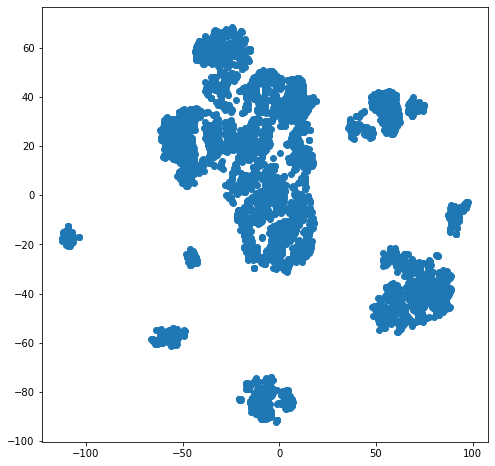

In [74]:
# Best tSNE result
tSNE_res = TSNE(n_components=2,
                perplexity=60,
                early_exaggeration=12,
                n_iter=3000,
                learning_rate=800).fit_transform(sp_scaled)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(tSNE_res[:, 0], tSNE_res[:, 1])
plt.show()

In [75]:
%store tSNE_res

Stored 'tSNE_res' (ndarray)


## VIII. Isomap

************************************************
n Neighbors 5


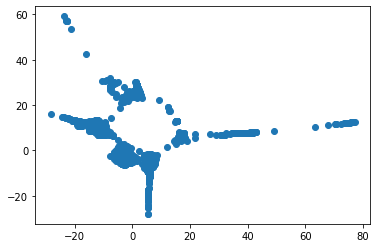

************************************************
n Neighbors 6


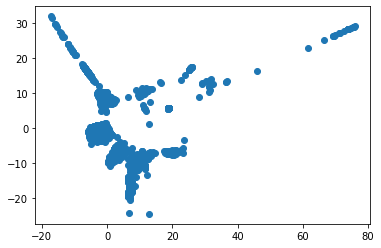

************************************************
n Neighbors 7


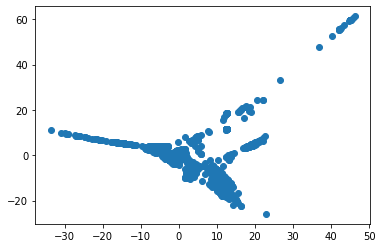

************************************************
n Neighbors 8


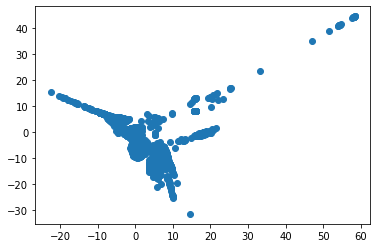

************************************************
n Neighbors 9


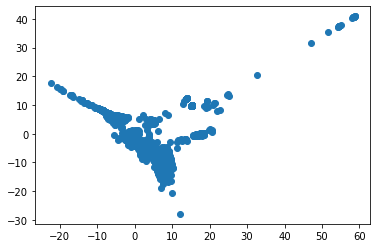

************************************************
n Neighbors 10


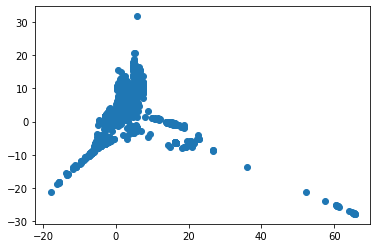

************************************************
n Neighbors 11


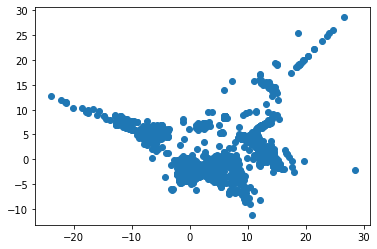

************************************************
n Neighbors 12


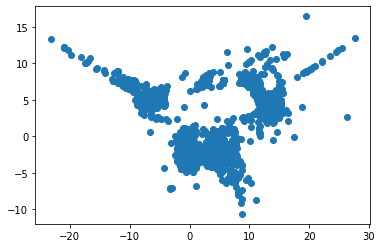

************************************************
n Neighbors 13


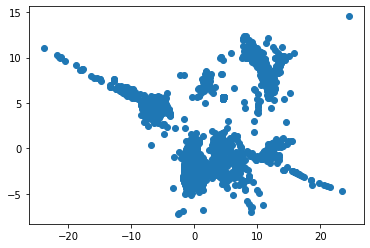

************************************************
n Neighbors 14


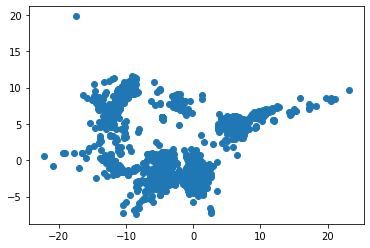

************************************************
n Neighbors 15


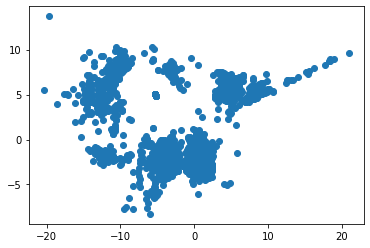

In [57]:
from sklearn.manifold import Isomap

neighb = np.arange(5, 16, 1)

for i in neighb:
    print('************************************************')
    print('n Neighbors', i)
    Iso = Isomap(n_components=2, n_neighbors=i).fit_transform(sp_scaled)

    # Plot different Isomap results
    plt.scatter(Iso[:, 0], Iso[:, 1])
    plt.show()

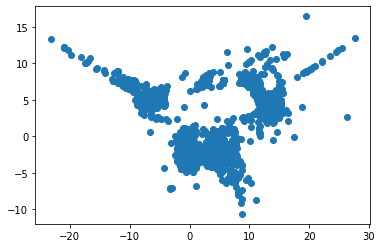

In [53]:
# Best result
Iso = Isomap(n_components=2, n_neighbors=12).fit_transform(sp_scaled)

plt.scatter(Iso[:, 0], Iso[:, 1])
plt.show()